In [11]:
import xarray as xr

fn1 = '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/ECHAM-SALSA/SALSA_BSOA_feedback/SALSA_BSOA_feedback_201207_ceff.nc'
fn2 = '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/ECHAM-SALSA/SALSA_BSOA_feedback/SALSA_BSOA_feedback_201207_ceff_ct.nc'
fn3 = '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/ECHAM-SALSA/SALSA_BSOA_feedback/SALSA_BSOA_feedback_201207_clfr.nc'
fn4 = '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/ECHAM-SALSA/SALSA_BSOA_feedback/SALSA_BSOA_feedback_201207_cl_time.nc'
fn5 = '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/ECHAM-SALSA/SALSA_BSOA_feedback/SALSA_BSOA_feedback_201207_cwp.nc'
fn6 = '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/ECHAM-SALSA/SALSA_BSOA_feedback/SALSA_BSOA_feedback_201207_lcdnc.nc'
fn7 = '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/ECHAM-SALSA/SALSA_BSOA_feedback/SALSA_BSOA_feedback_201207_lcdnc_ct.nc'

_ds = xr.open_mfdataset([fn1,fn2,fn3,fn4, fn5, fn6,fn7], decode_cf = False)

_ds['clfr'].attrs['units'] = 'fraction'

_ds['cl_time'].attrs['units'] = 'fraction'

_ds = xr.decode_cf(_ds)

_ds.load()

<xarray.Dataset>
Dimensions:   (time: 744, lon: 192, lat: 96, lev: 47, nhyi: 48, nhym: 47)
Coordinates:
  * time      (time) datetime64[ns] 2012-07-01T00:52:30 ... 2012-07-31T23:52:30
  * lon       (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat       (lat) float64 88.57 86.72 84.86 83.0 ... -84.86 -86.72 -88.57
  * lev       (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 43.0 44.0 45.0 46.0 47.0
Dimensions without coordinates: nhyi, nhym
Data variables:
    hyai      (nhyi) float64 0.0 1.989 6.572 15.67 30.62 ... 72.06 0.0 0.0 0.0
    hybi      (nhyi) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9442 0.973 0.9923 1.0
    hyam      (nhym) float64 0.9946 4.281 11.12 23.15 ... 171.8 36.03 0.0 0.0
    hybm      (nhym) float64 0.0 0.0 0.0 0.0 0.0 ... 0.926 0.9586 0.9827 0.9961
    ceff      (time, lev, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ceff_ct   (time, lat, lon) float32 13.66 13.98 13.93 14.1 ... 0.0 0.0 0.0
    cl_time   (time, lev, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    clfr      (time, lev, lat, lon) float32 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    cwp       (time, lat, lon) float32 0.1401 0.1401 0.1387 ... 0.0 0.0 0.0
    lcdnc     (time, lev, lat, lon) float32 -2.579e-24 7.476e-24 ... 3.256e-29
    lcdnc_ct  (time, lat, lon) float32 9.94e+06 1e+07 1e+07 ... 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Thu Mar 31 06:35:53 2022: cdo -O -copy -setattribute,ceff@u...
    CDO:          Climate Data Operators version 1.9.7.1 (http://mpimet.mpg.d...

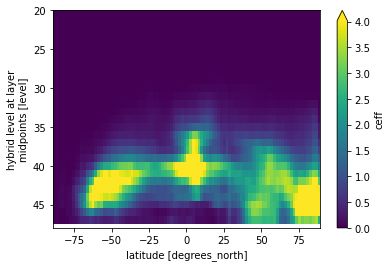

In [12]:
(_ds['ceff']*1e6).mean(['time','lon']).plot(robust=True, ylim=[48,20])

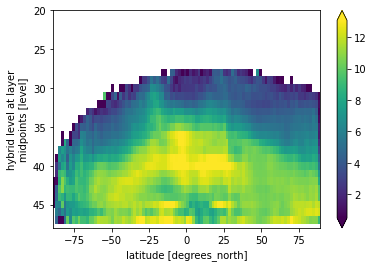

In [13]:
((_ds['ceff']*1e6).mean(['time','lon'])/_ds['cl_time'].mean(['time','lon'])).plot(robust=True, ylim=[48,20])

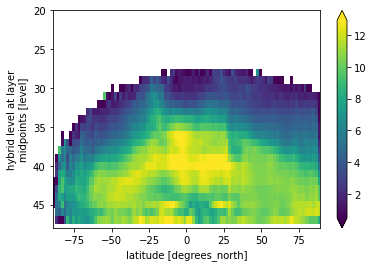

In [14]:
(_ds['ceff']/_ds['cl_time']*1e6).mean(['time','lon']).plot(robust=True, ylim=[48,20])

In [15]:
_ds['clfr']#.sum('lev').sum('time').plot()

<xarray.DataArray 'clfr' (time: 744, lev: 47, lat: 96, lon: 192)>
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
...
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ]],

        [[0.23598148, 0.25735033, 0.2617681 , ..., 0.22833166,
          0.22975773, 0.24537699],
         [1.        , 1.        , 1.        , ..., 1.        ,
          0.70591444, 1.        ],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2012-07-01T00:52:30 ... 2012-07-31T23:52:30
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 43.0 44.0 45.0 46.0 47.0
Attributes:
    long_name:    cloud_fraction
    units:        fraction
    description:  cloud fraction

(array([6.09287262e+08, 2.02560700e+06, 1.89819300e+06, 1.70022200e+06,
        0.00000000e+00, 1.93356300e+06, 1.70975100e+06, 1.91917700e+06,
        1.84645200e+06, 2.22099490e+07]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

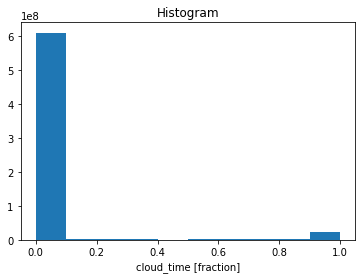

In [16]:
_ds['cl_time'].plot()

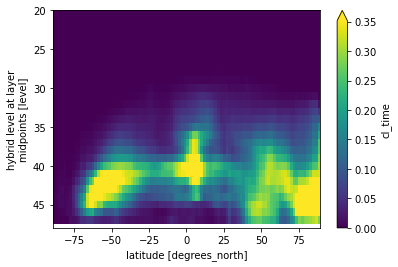

In [17]:
_ds['cl_time'].mean(['time','lon']).plot(robust=True, ylim=[48,20])

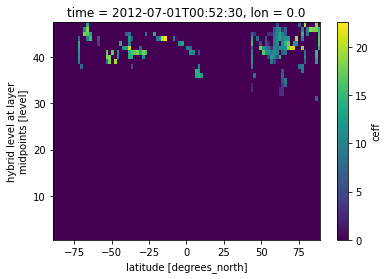

In [18]:
(_ds['ceff']*1e6).isel(time=0, lon=0).plot()

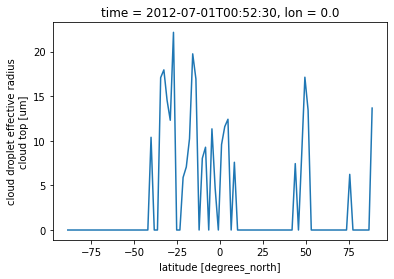

In [19]:
(_ds['ceff_ct']).isel(time=0, lon=0).plot()

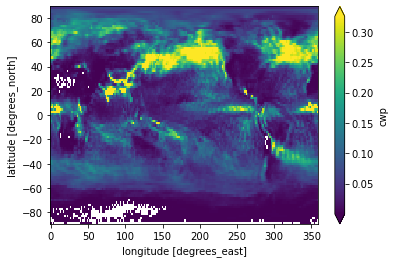

In [20]:
_ds['cwp'].mean(['time']).where(_ds['cwp'].mean(['time'])>0).plot(robust=True)

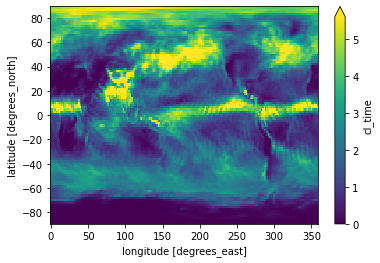

In [21]:
_ds['cl_time'].mean(['time']).sum('lev').plot(robust=True)

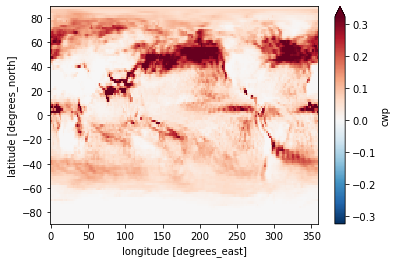

In [22]:
_ds['cwp'].mean(['time']).plot(robust=True)

## Extract cloud top ceff? 

In [23]:
a,b = xr.broadcast(_ds['ceff'], _ds['ceff_ct'])

In [24]:
_ds['ceff_diff'] = 1e6*_ds['ceff']-b

In [25]:
import numpy as np

In [26]:
_ds['ceff_abs_diff']  = np.abs(_ds['ceff_diff'])#.where(_ds['cl_time']>0)

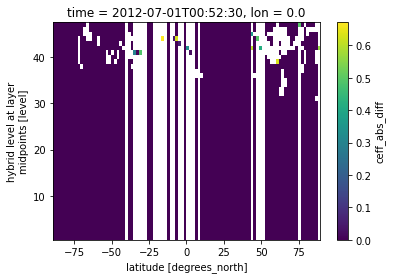

In [27]:
_ds['ceff_abs_diff'].where(_ds['ceff_abs_diff']<1).isel(lon=0,time=0).plot()

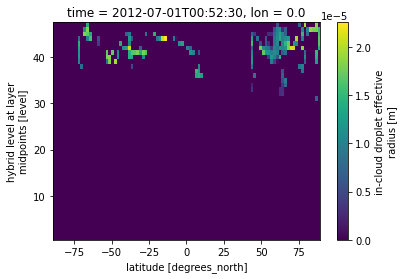

In [28]:
_ds['ceff'].where(_ds['ceff_abs_diff']>-1).isel(lon=0,time=0).plot()

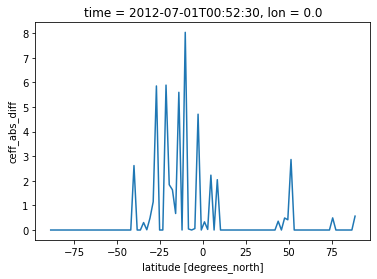

In [29]:
_ds['ceff_abs_diff'].isel(_ds['ceff_abs_diff'].argmin(['lev'])).isel(lon=0,time=0).plot()

In [32]:
import matplotlib.pyplot as plt

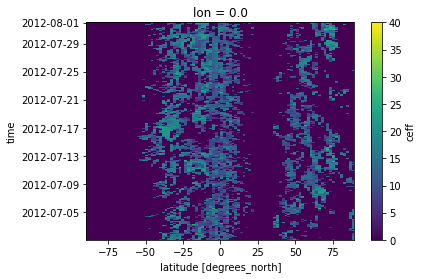

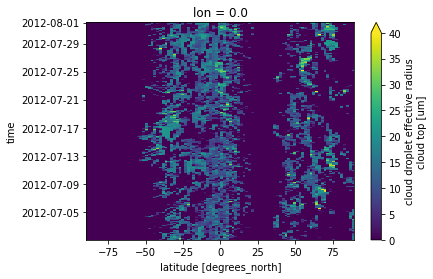

In [33]:
(1e6*_ds['ceff'].isel(_ds['ceff_abs_diff'].argmin(['lev']))).isel(lon=0).plot(vmax=40)
plt.show()
(_ds['ceff_ct']).isel(lon=0,).plot(vmax=40)

In [34]:
def extract_2D_cloud_time(ds, cloud_top_var = 'ceff_ct', cloud_var = 'ceff'):
    a,b = xr.broadcast(ds[cloud_var], ds[cloud_top_var])
    diff = a-b
    diff = np.fabs(diff)
    ds['cl_time_ct'] = ds['cl_time'].isel(diff.argmin(['lev']))
    ds['cl_time_ct'] = ds['cl_time_ct'].where(ds['cl_time_ct']>1e-12)
    
    ds['diff_v'] = diff
    ds['diff_v_argminlev'] = diff.argmin('lev')
    return ds
    
    #ds['ceff_diff'] = 1e6*_ds['ceff']-b

In [37]:
_ds['ceff_mic'] = _ds['ceff']*1e6
_ds['lcdnc_cm3'] = _ds['lcdnc']*1e-6
_ds['lcdnc_ct_cm3'] = _ds['lcdnc_ct']*1e-6

In [58]:
_ds = extract_2D_cloud_time(_ds, cloud_top_var='ceff_ct',cloud_var='ceff_mic')

(array([  39.,   34.,   37.,    0.,   43.,   54.,    0.,   78.,   78.,
        2723.]),
 array([0.125 , 0.2125, 0.3   , 0.3875, 0.475 , 0.5625, 0.65  , 0.7375,
        0.825 , 0.9125, 1.    ], dtype=float32),
 <BarContainer object of 10 artists>)

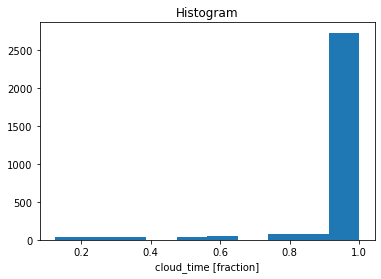

In [59]:
_ds['cl_time_ct'].sel(lat = slice(66,60), lon= slice(22,30)).plot()

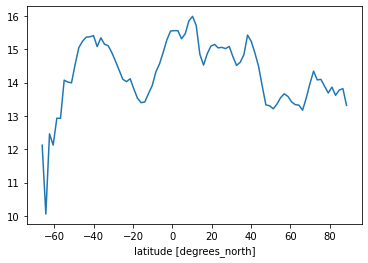

In [60]:
(_ds['ceff_ct']/_ds['cl_time_ct']).mean(['lon','time']).plot()

In [ ]:
_ds = extract_2D_cloud_time(_ds, cloud_top_var='lcdnc_ct_cm3',cloud_var='lcdnc_cm3')

In [48]:
cloud_top_var = 'lcdnc_ct_cm3'
cloud_var = 'lcdnc_cm3'
ds = _ds
a,b = xr.broadcast(ds[cloud_var], ds[cloud_top_var])
diff = a-b
diff = np.fabs(diff)


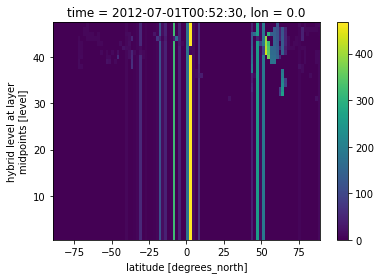

In [49]:
diff.isel(lon=0,time=0).plot()

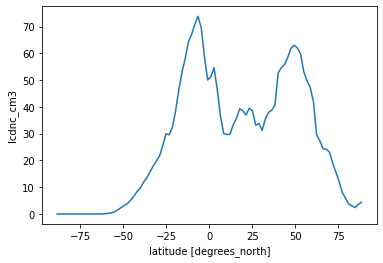

In [50]:
ds['lcdnc_cm3'].isel(lev=ds['diff_v_argminlev']).mean(['lon','time']).plot()

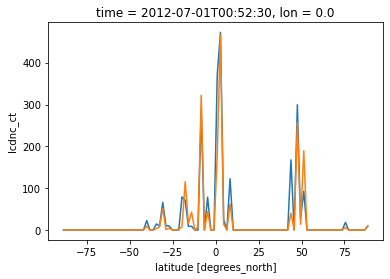

In [51]:
ds['lcdnc_cm3'].isel(lev=ds['diff_v_argminlev']).isel(lon=0,time=0).plot()

(1e-6*ds['lcdnc_ct'].isel(lon=0,time=0)).plot()

In [52]:
_ds['ceff_masked'] = 1e6*_ds['ceff'].isel(_ds['ceff_abs_diff'].argmin(['lev']))

In [53]:
_ds['cl_time_masked'] = _ds['cl_time'].isel(_ds['ceff_abs_diff'].argmin(['lev']))

In [54]:
_ds['ceff_masked'] = _ds['ceff_masked'].where(_ds['cl_time_masked']>1e-12)
_ds['ceff_ct_masked'] = _ds['ceff_ct'].where(_ds['cl_time_masked']>1e-12)

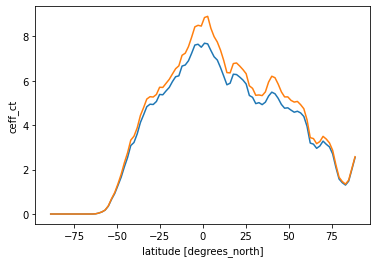

In [55]:
(1e6*_ds['ceff'].isel(_ds['ceff_abs_diff'].argmin(['lev']))).mean(['lon','time']).plot()

(_ds['ceff_ct']).mean(['lon','time']).plot()

In [ ]:
_

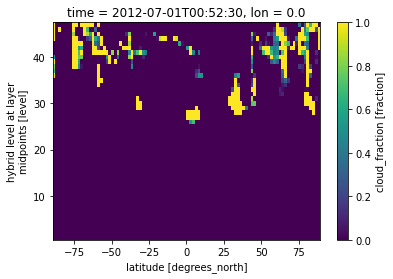

In [189]:
_ds['clfr'].isel(lon=0,time=0).plot()

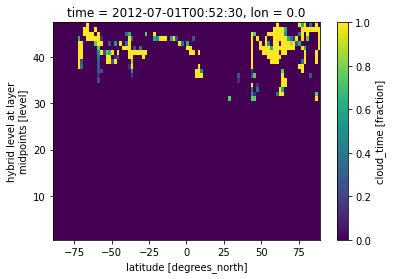

In [191]:
_ds['cl_time'].isel(lon=0,time=0).plot()

In [190]:
_ds['lcdnc_ct']

<xarray.DataArray 'lcdnc_ct' (time: 744, lat: 96, lon: 192)>
array([[[ 9939655.   , 10000000.   , 10000000.   , ...,  7841002.   ,
          8225038.   ,  8747191.   ],
        [       0.   ,        0.   ,   162852.77 , ...,        0.   ,
                0.   ,        0.   ],
        [       0.   ,        0.   ,        0.   , ...,        0.   ,
                0.   ,        0.   ],
        ...,
        [       0.   ,        0.   ,        0.   , ...,        0.   ,
                0.   ,        0.   ],
        [       0.   ,        0.   ,        0.   , ...,        0.   ,
                0.   ,        0.   ],
        [       0.   ,        0.   ,        0.   , ...,        0.   ,
                0.   ,        0.   ]],

       [[10000000.   , 10000000.   , 10000000.   , ...,  8616231.   ,
          9634216.   ,  9766706.   ],
        [       0.   ,        0.   ,        0.   , ...,   784162.94 ,
           253393.06 ,    28432.729],
        [       0.   ,        0.   ,        0.   , ...,        0.   ,
                0.   ,        0.   ],
...
        [       0.   ,        0.   ,        0.   , ...,        0.   ,
                0.   ,        0.   ],
        [       0.   ,        0.   ,        0.   , ...,        0.   ,
                0.   ,        0.   ],
        [       0.   ,        0.   ,        0.   , ...,        0.   ,
                0.   ,        0.   ]],

       [[       0.   ,        0.   ,        0.   , ...,        0.   ,
                0.   ,        0.   ],
        [       0.   ,        0.   ,        0.   , ...,        0.   ,
                0.   ,        0.   ],
        [       0.   ,        0.   ,        0.   , ...,        0.   ,
                0.   ,        0.   ],
        ...,
        [       0.   ,        0.   ,        0.   , ...,        0.   ,
                0.   ,        0.   ],
        [       0.   ,        0.   ,        0.   , ...,        0.   ,
                0.   ,        0.   ],
        [       0.   ,        0.   ,        0.   , ...,        0.   ,
                0.   ,        0.   ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2012-07-01T00:52:30 ... 2012-07-31T23:52:30
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
Attributes:
    long_name:    liquid_cloud_droplet_number_concentration_cloud_top
    units:        cm-3
    description:  Liquid cloud droplet number concentration cloud top

In [155]:
_ds.isel(lev=_ds['diff_v'].argmin('lev'))

<xarray.Dataset>
Dimensions:     (time: 744, lon: 192, lat: 96, nhyi: 48, nhym: 47)
Coordinates:
  * time        (time) datetime64[ns] 2012-07-01T00:52:30 ... 2012-07-31T23:5...
  * lon         (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat         (lat) float64 88.57 86.72 84.86 83.0 ... -84.86 -86.72 -88.57
    lev         (time, lat, lon) float64 42.0 42.0 42.0 42.0 ... 1.0 1.0 1.0 1.0
Dimensions without coordinates: nhyi, nhym
Data variables: (12/14)
    hyai        (nhyi) float64 0.0 1.989 6.572 15.67 30.62 ... 72.06 0.0 0.0 0.0
    hybi        (nhyi) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9442 0.973 0.9923 1.0
    hyam        (nhym) float64 0.9946 4.281 11.12 23.15 ... 171.8 36.03 0.0 0.0
    hybm        (nhym) float64 0.0 0.0 0.0 0.0 ... 0.926 0.9586 0.9827 0.9961
    ceff        (time, lat, lon) float32 1.423e-05 1.432e-05 ... 0.0 0.0
    ceff_ct     (time, lat, lon) float32 13.66 13.98 13.93 14.1 ... 0.0 0.0 0.0
    ...          ...
    cwp         (time, lat, lon) float32 0.1401 0.1401 0.1387 ... 0.0 0.0 0.0
    lcdnc       (time, lat, lon) float32 9.278e+06 9.278e+06 ... 4.387e-25
    lcdnc_ct    (time, lat, lon) float32 9.94e+06 1e+07 1e+07 ... 0.0 0.0 0.0
    ceff_mic    (time, lat, lon) float32 14.23 14.32 14.3 14.33 ... 0.0 0.0 0.0
    cl_time_ct  (time, lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... nan nan nan nan
    diff_v      (time, lat, lon) float32 0.5638 0.3478 0.3695 ... 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Thu Mar 31 06:35:53 2022: cdo -O -copy -setattribute,ceff@u...
    CDO:          Climate Data Operators version 1.9.7.1 (http://mpimet.mpg.d...

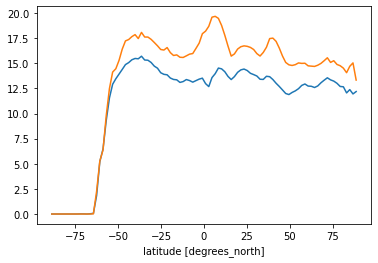

In [195]:
(_ds['ceff_mic'].isel(lev=_ds['diff_v'].argmin('lev'))/_ds['cl_time_ct']).mean(['lon','time']).plot()

(_ds['ceff_ct']/_ds['cl_time_ct']).mean(['lon','time']).plot()

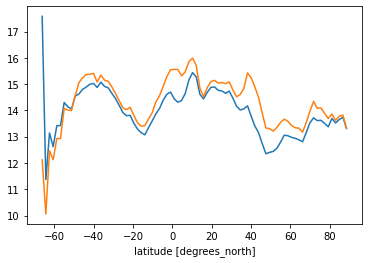

In [157]:
(_ds['ceff_mic'].isel(lev=_ds['diff_v'].argmin('lev'))/_ds['cl_time_ct']).mean(['lon','time']).plot()

(_ds['ceff_ct']/_ds['cl_time_ct']).mean(['lon','time']).plot()

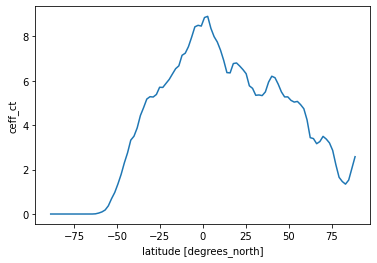

In [10]:
(_ds['ceff_ct']).mean(['lon','time']).plot()

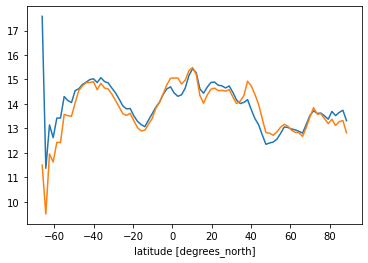

In [134]:
(_ds['ceff_masked']/_ds['cl_time_ct']).mean(['lon','time']).plot()

(_ds['ceff_ct_masked']//_ds['cl_time_ct']).mean(['lon','time']).plot()

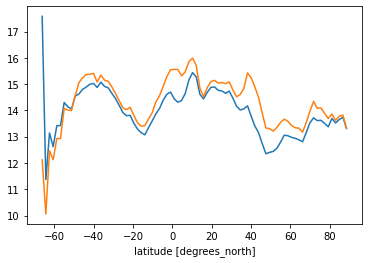

In [126]:
(_ds['ceff_masked']/_ds['cl_time_masked']).mean(['lon','time']).plot()

(_ds['ceff_ct_masked']/_ds['cl_time_masked']).mean(['lon','time']).plot()

In [74]:
_ds['ceff_sel'] = _ds['ceff'].isel(_ds['ceff_abs_diff'].argmin(['lev']))


In [76]:
_ds['ceff_sel'] = _ds['ceff_sel'].where(b>1e-9)

(array([40138., 14570., 38493., 65377., 68432., 55836., 14100.,  1457.,
          188.,   188.]),
 array([ 0.       ,  3.1177716,  6.2355433,  9.353314 , 12.4710865,
        15.588858 , 18.706629 , 21.8244   , 24.942173 , 28.059944 ,
        31.177715 ], dtype=float32),
 <BarContainer object of 10 artists>)

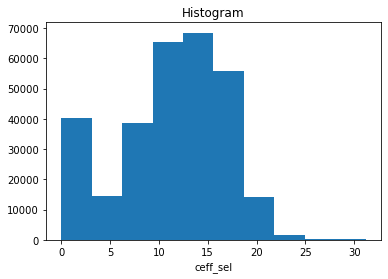

In [80]:
(_ds['ceff_sel']*1e6).isel(time=0, lo).plot()#vmax=30)#vmax=20, vmin=0)

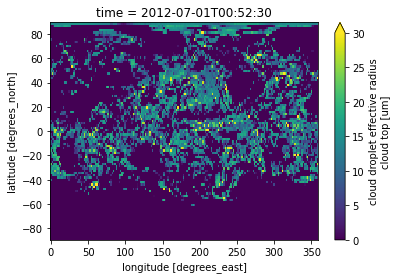

In [67]:
(_ds['ceff_ct']).isel(time=0).plot(vmax=30)#vmax=20, vmin=0)

In [64]:
import matplotlib.pyplot as plt

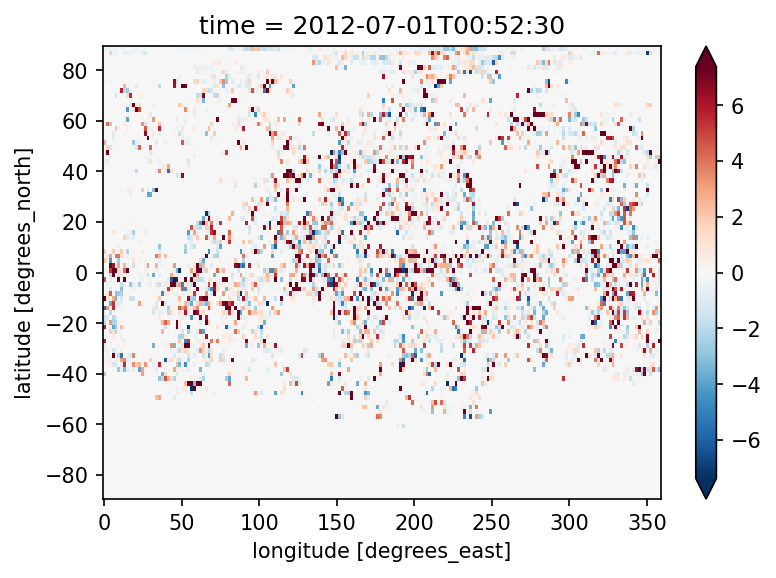

In [65]:
plt.figure(dpi=150)
(_ds['ceff_ct']-_ds['ceff_sel']*1e6).isel(time=0).plot(robust=True,)#vmax=30)#vmax=20, vmin=0)

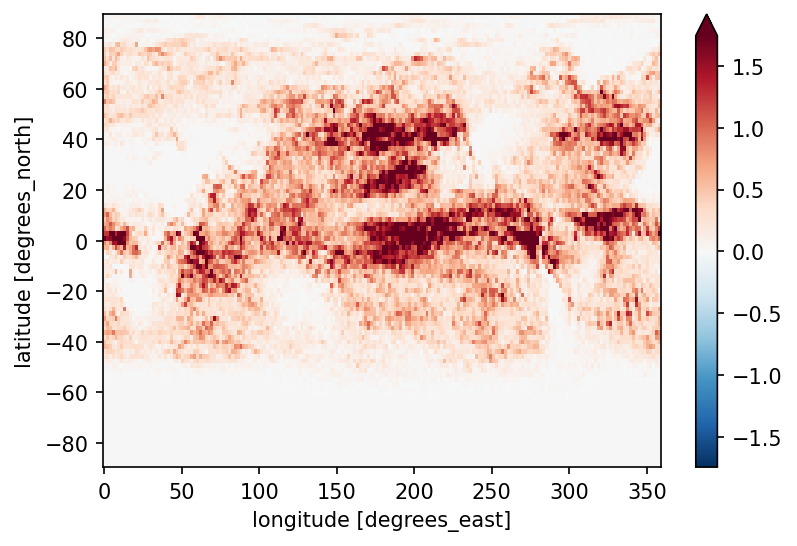

In [66]:
plt.figure(dpi=150)
(_ds['ceff_ct']-_ds['ceff_sel']*1e6).mean('time').plot(robust=True,)#vmax=30)#vmax=20, vmin=0)

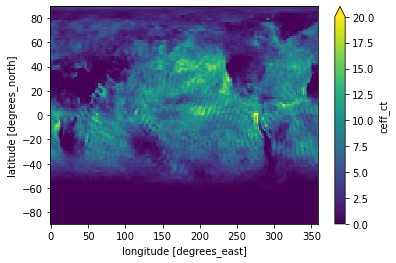

In [ ]:
(_ds['ceff_ct']).mean('time').plot(vmax=20, vmin=0)

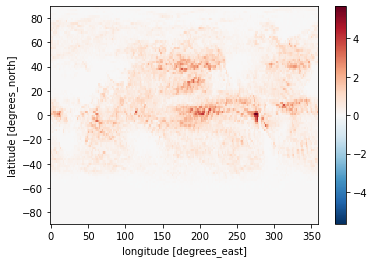

In [53]:
(_ds['ceff_ct']-_ds['ceff_sel']*1e6).mean('time').plot()#vmax=20, vmin=0)

In [36]:
_ds['ceff_masked'] = _ds['ceff'].where()

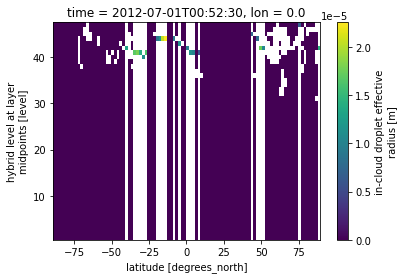

In [40]:
_ds['ceff_masked'].isel(lon=0,time=0).plot()

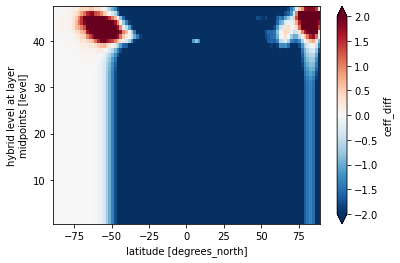

In [39]:
_ds['ceff_diff'].mean(['time','lon']).plot(vmin=-2,vmax=2, cmap='RdBu_r')

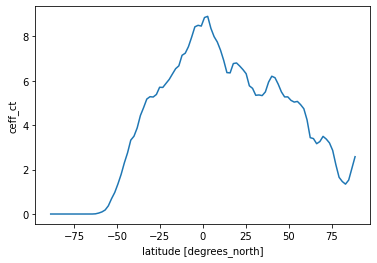

In [27]:
_ds['ceff_ct'].mean(['time','lon']).plot()

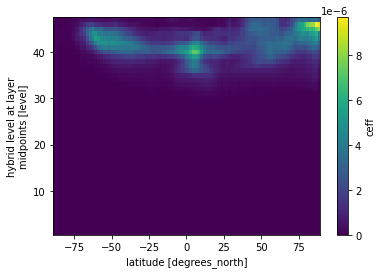

In [26]:
_ds['ceff'].mean(['time','lon']).plot()